## Searching for a regression model for Critical Temperature

#### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# plt.style.use('dark_background')
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

#### Read data

In [2]:
data = pd.read_csv("SC_data_elem_wt.csv")

#### Extract Symbols

In [3]:
symbols = [col for col in data if col.endswith('_x')]

#### Construct features upto quadratic order

In [4]:
data_ = pd.DataFrame(columns={})

In [5]:
data_["Compound"] = data["Compound"]

In [6]:
data_["Critical Temperature"] = 0.0
data_["Critical Temperature"] = data["Critical Temperature"]

In [7]:
for symbol in symbols:
    data_[symbol] = 0.0
    data_[symbol] = data[symbol] 

In [8]:
data_["x-total"] = 0.0
for symbol in symbols:
    data_["x-total"] = data_["x-total"] + np.array(data_[symbol], dtype=float)
    data_[symbol[:-2]+"_p"] = 0.0

In [9]:
for symbol in symbols:
    data_[symbol[:-2]+"_p"] = data_[symbol]/data_["x-total"]

#### Save data x <-> p

In [10]:
data_.to_csv("SC_data_frac.csv", index=None, header=True)

In [10]:
count = 0
sym_pair = []
for i in range(len(symbols)):
    for j in range(i,len(symbols)):
        q_pair = data_[symbols[i][:-2]+"_p"]*data_[symbols[j][:-2]+"_p"]
        q_sum = np.sum(q_pair>0.0)
        if (q_sum>0):
            data_[symbols[i][:-2]+"_p"+","+symbols[j][:-2]+"_p"] = 0.0
            data_[symbols[i][:-2]+"_p"+","+symbols[j][:-2]+"_p"] = q_pair
            count += 1
print(count, "- composite features added.") 

2298 - composite features added.


#### Save data x <-> p <-> p^2

In [ ]:
data_.to_csv("SC_data_quad_frac.csv", index=None, header=True)

#### Load data from file

In [76]:
data_ = pd.read_csv("SC_data_quad_frac.csv") 

#### Check correlations

In [11]:
icol_corr = [data_.columns.get_loc(col[:-2]+"_p") for col in data_ if col.endswith("_x") ]

In [12]:
icol_corr.append(data_.columns.get_loc("Critical Temperature"))

In [13]:
corr_mat = data_.iloc[3966:,icol_corr].corr()

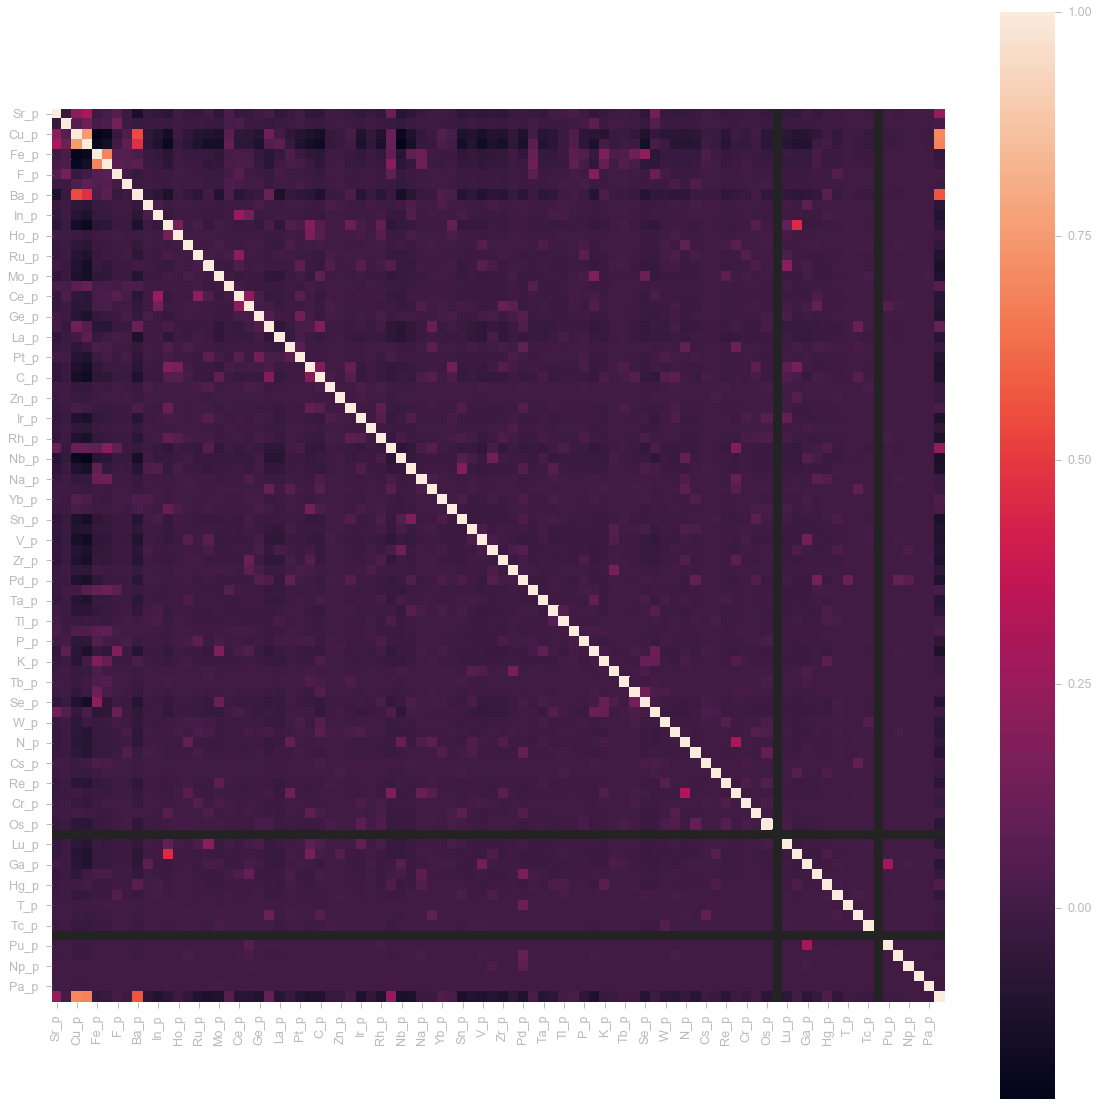

In [14]:
fig = plt.figure(figsize = (20,20))

sb.heatmap(corr_mat, square = True)
plt.show()


In [16]:
X_data = data_.iloc[:,data_.columns.str.contains("_p")]
X_data["p-total"] = 1.0
Y_data = data_.loc[:,["Critical Temperature"]]
print("First", int(np.sum(Y_data==0)), "compounds have zero Critical Temperature")

First 3966 compounds have zero Critical Temperature


D:\sayan\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
def normal_eqn(Xtrain,Ytrain,Xtest,Ytest):
    A_mat = np.matmul(np.array(Xtrain).T,np.array(Xtrain))
    A_mat_inv = np.linalg.pinv(A_mat)
    B_mat = np.matmul(A_mat_inv,np.array(Xtrain).T)
    theta_params = np.matmul(B_mat,np.array(Ytrain))
    Y_pred = np.matmul(np.array(Xtest),theta_params)

    plt.figure(figsize=(10,10))
    plt.scatter(Ytest,Y_pred)
    plt.xlim(0,150)
    plt.ylim(0,150)
    plt.xlabel("Experimental T_c")
    plt.ylabel("Predicted T_c")
    plt.show()
    
    error_Y = np.sum(np.abs(Y_pred-np.array(Ytest))/len(Ytest))
    print("Error in prediction : ", error_Y)
    return error_Y,Y_pred,theta_params

In [81]:
data_shuffle = data_.iloc[3966:,:].sample(frac=1).reset_index(drop=True)

In [127]:
X_data = data_shuffle.iloc[:,data_shuffle.columns.str.contains("_p")]
# X_data["p-total"] = 1.0
Y_data = data_shuffle.iloc[:,data_shuffle.columns.str.contains("Critical Temperature")]

In [21]:
data_shuffle = data_.iloc[3966:,:].reset_index(drop=True)
X_data = data_shuffle.iloc[:,data_shuffle.columns.str.contains("_p")]
# X_data["p-total"] = 1.0
Y_data = data_shuffle.iloc[:,data_shuffle.columns.str.contains("Critical Temperature")]
X_train = X_data.iloc[:int(len(Y_data)*0.9),:]
Y_train = Y_data.iloc[:int(len(Y_data)*0.9),:]
X_test = X_data.iloc[int(len(Y_data)*0.9):,:]
Y_test = Y_data.iloc[int(len(Y_data)*0.9):,:]

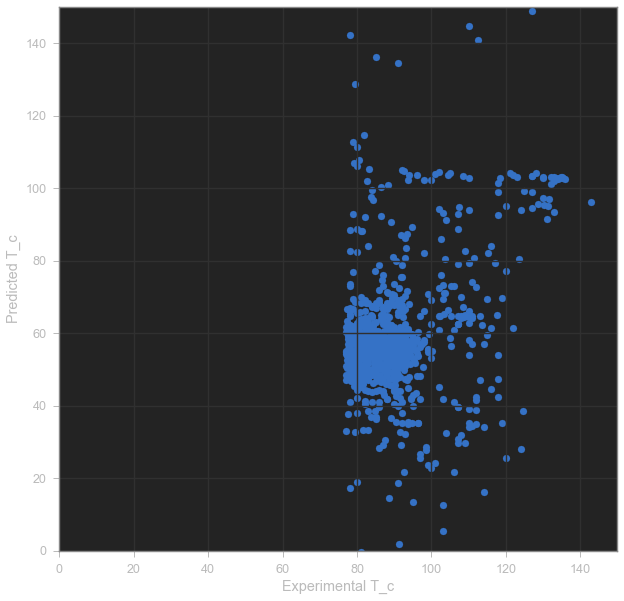

Error in prediction :  41.010561051663785


In [22]:
error_Y_quad,Y_pred_quad,theta_params_quad = normal_eqn(X_train,Y_train,X_test,Y_test)

#### Try with raw raw feature instead of weights

In [113]:
count = 0
sym_pair = []
for i in range(len(symbols)):
    for j in range(i,len(symbols)):
        q_pair = data_[symbols[i]]*data_[symbols[j]]
        q_sum = np.sum(q_pair>0.0)
        if (q_sum>0):
            data_[symbols[i]+","+symbols[j]] = 0.0
            data_[symbols[i]+","+symbols[j]] = q_pair
            count += 1
print(count, "- composite features added.") 

2298 - composite features added.


#### Save data x <-> x^2 <-> p <-> p^2

In [114]:
data_.to_csv("SC_data_quad_x.csv", index=None, header=True)

In [115]:
data_shuffle = data_.iloc[3966:,:].sample(frac=1).reset_index(drop=True)

In [116]:
X_data = data_shuffle.iloc[:,data_shuffle.columns.str.contains("_x")]
# X_data["p-total"] = 1.0
Y_data = data_shuffle.iloc[:,data_shuffle.columns.str.contains("Critical Temperature")]

In [117]:
X_train = X_data.iloc[:int(len(Y_data)*0.9),:]
Y_train = Y_data.iloc[:int(len(Y_data)*0.9),:]
X_test = X_data.iloc[int(len(Y_data)*0.9):,:]
Y_test = Y_data.iloc[int(len(Y_data)*0.9):,:]

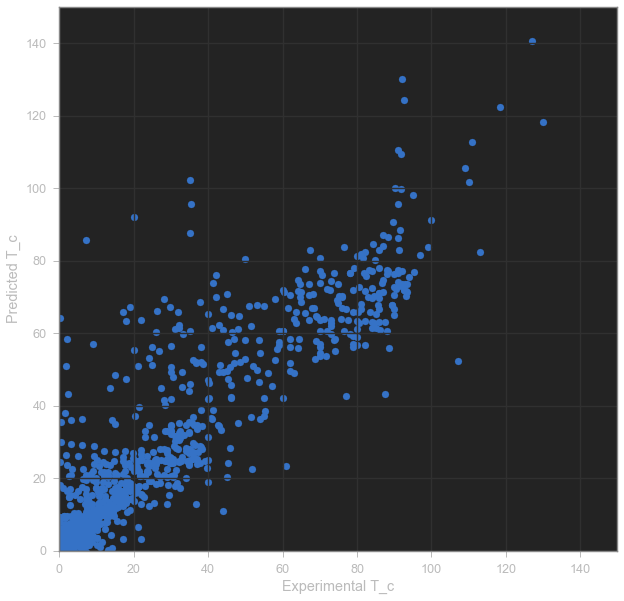

Error in prediction :  164.16678799956918


In [18]:
error_Y_quad_x,Y_pred_quad_x,theta_params_quad_x = normal_eqn(X_train,Y_train,X_test,Y_test)

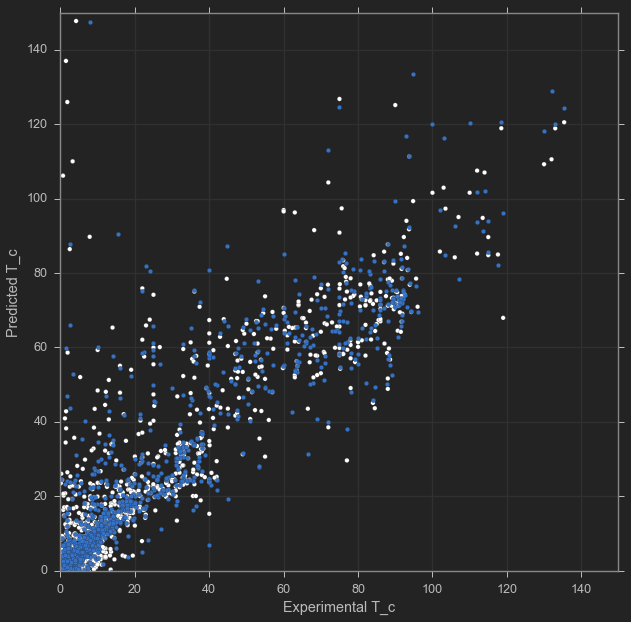

In [145]:
plt.figure(figsize=(10,10))

plt.scatter(Y_test,Y_pred_quad_x,c=1.0*np.array(Y_test/Y_test))
plt.scatter(Y_test,Y_pred_quad)

plt.xlim(0,150)
plt.ylim(0,150)
plt.xlabel("Experimental T_c")
plt.ylabel("Predicted T_c")
plt.show()